In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
bklyn = pd.read_csv('BK_incdist_pricefreq.csv')

In [19]:
bklyn10 = bklyn.head(10)

In [20]:
bklyn10.columns

Index(['Unnamed: 0', 'GEOID', 'price_$', 'price_$$', 'price_$$$', 'price_$$$$',
       'MISSING', 'Geography', 'Households', 'pct_0-25k', 'pct_25k-50k',
       'pct_50k-75k', 'pct_75k-100k', 'pct_100k-125k', 'pct_125k-150k',
       'pct_> 150k', 'num_0-25k', 'num_25k-50k', 'num_50k-75k', 'num_75k-100k',
       'num_100k-125k', 'num_125k-150k', 'num_> 150k'],
      dtype='object')

In [37]:
bklyn10['density'] = (bklyn10['price_$'] + bklyn10['price_$$'] + bklyn10['price_$$$'] + bklyn10['price_$$$$'] + bklyn10['MISSING'])/ bklyn10['Households']

C:\Users\Earl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
bklyn10.head()

,Unnamed: 0,GEOID,price_$,price_$$,price_$$$,price_$$$$,MISSING,Geography,Households,pct_0-25k,...,pct_> 150k,num_0-25k,num_25k-50k,num_50k-75k,num_75k-100k,num_100k-125k,num_125k-150k,num_> 150k,ratio,density
0,0,36047000100,6,11,2,0,1,"Census Tract 1, Kings County, New York",2184,0.212,...,0.281,463.008,216.216,190.008,401.856,144.144,152.880,613.704,0.009158,0.009158
1,1,36047000200,5,8,0,0,12,"Census Tract 2, Kings County, New York",377,0.263,...,0.032,99.151,114.985,78.039,26.013,47.125,0.000,12.064,0.066313,0.066313
2,2,36047000301,1,4,0,0,0,"Census Tract 3.01, Kings County, New York",1865,0.043,...,0.435,80.195,382.325,16.785,199.555,231.260,141.740,811.275,0.002681,0.002681
3,3,36047000501,1,8,0,0,2,"Census Tract 5.01, Kings County, New York",1772,0.188,...,0.407,333.136,74.424,166.568,99.232,168.340,207.324,721.204,0.006208,0.006208
4,4,36047000502,5,7,0,0,2,"Census Tract 5.02, Kings County, New York",1560,0.132,...,0.399,205.920,179.400,115.440,166.920,154.440,112.320,622.440,0.008974,0.008974


In [15]:
# for one

#x = [1, 2, 3, 4]
#y = bklyn10.iloc[0]['price_$':'price_$$$$']
#tick_label_1 = ["$", "\$\$", "\$\$\$", "\$\$\$\$"]
#a = [1, 2, 3, 4, 5, 6, 7]
#b = bklyn10.iloc[0]['pct_0-25k':'pct_> 150k']
#tick_label_2 = ['0-25','25-50','50-75','75-100','100-125','125-150','>150']
#fig, ax = plt.subplots(figsize=(20, 10))

#plt.subplot(1,3,1)
#plt.bar(x,y, tick_label = tick_label_1)
#plt.title(bklyn10.iloc[0]['Geography'])
#plt.xlabel('Price Range')
#plt.ylabel('Number of Restaurants')

#plt.subplot(1,3,2)
#plt.bar(a,b, tick_label = tick_label_2)
#plt.title(bklyn10.iloc[0]['Geography'])
#plt.xlabel('Income Range (in $1000s)')
#plt.ylabel('Percentage of Residents')

#plt.subplot(1,3,3)
#plt.bar(a,b, tick_label = tick_label_2)
#plt.title(bklyn10.iloc[0]['Geography'])
#plt.xlabel('Income Range (in $1000s)')
#plt.ylabel('Percentage of Residents')
#plt.show()

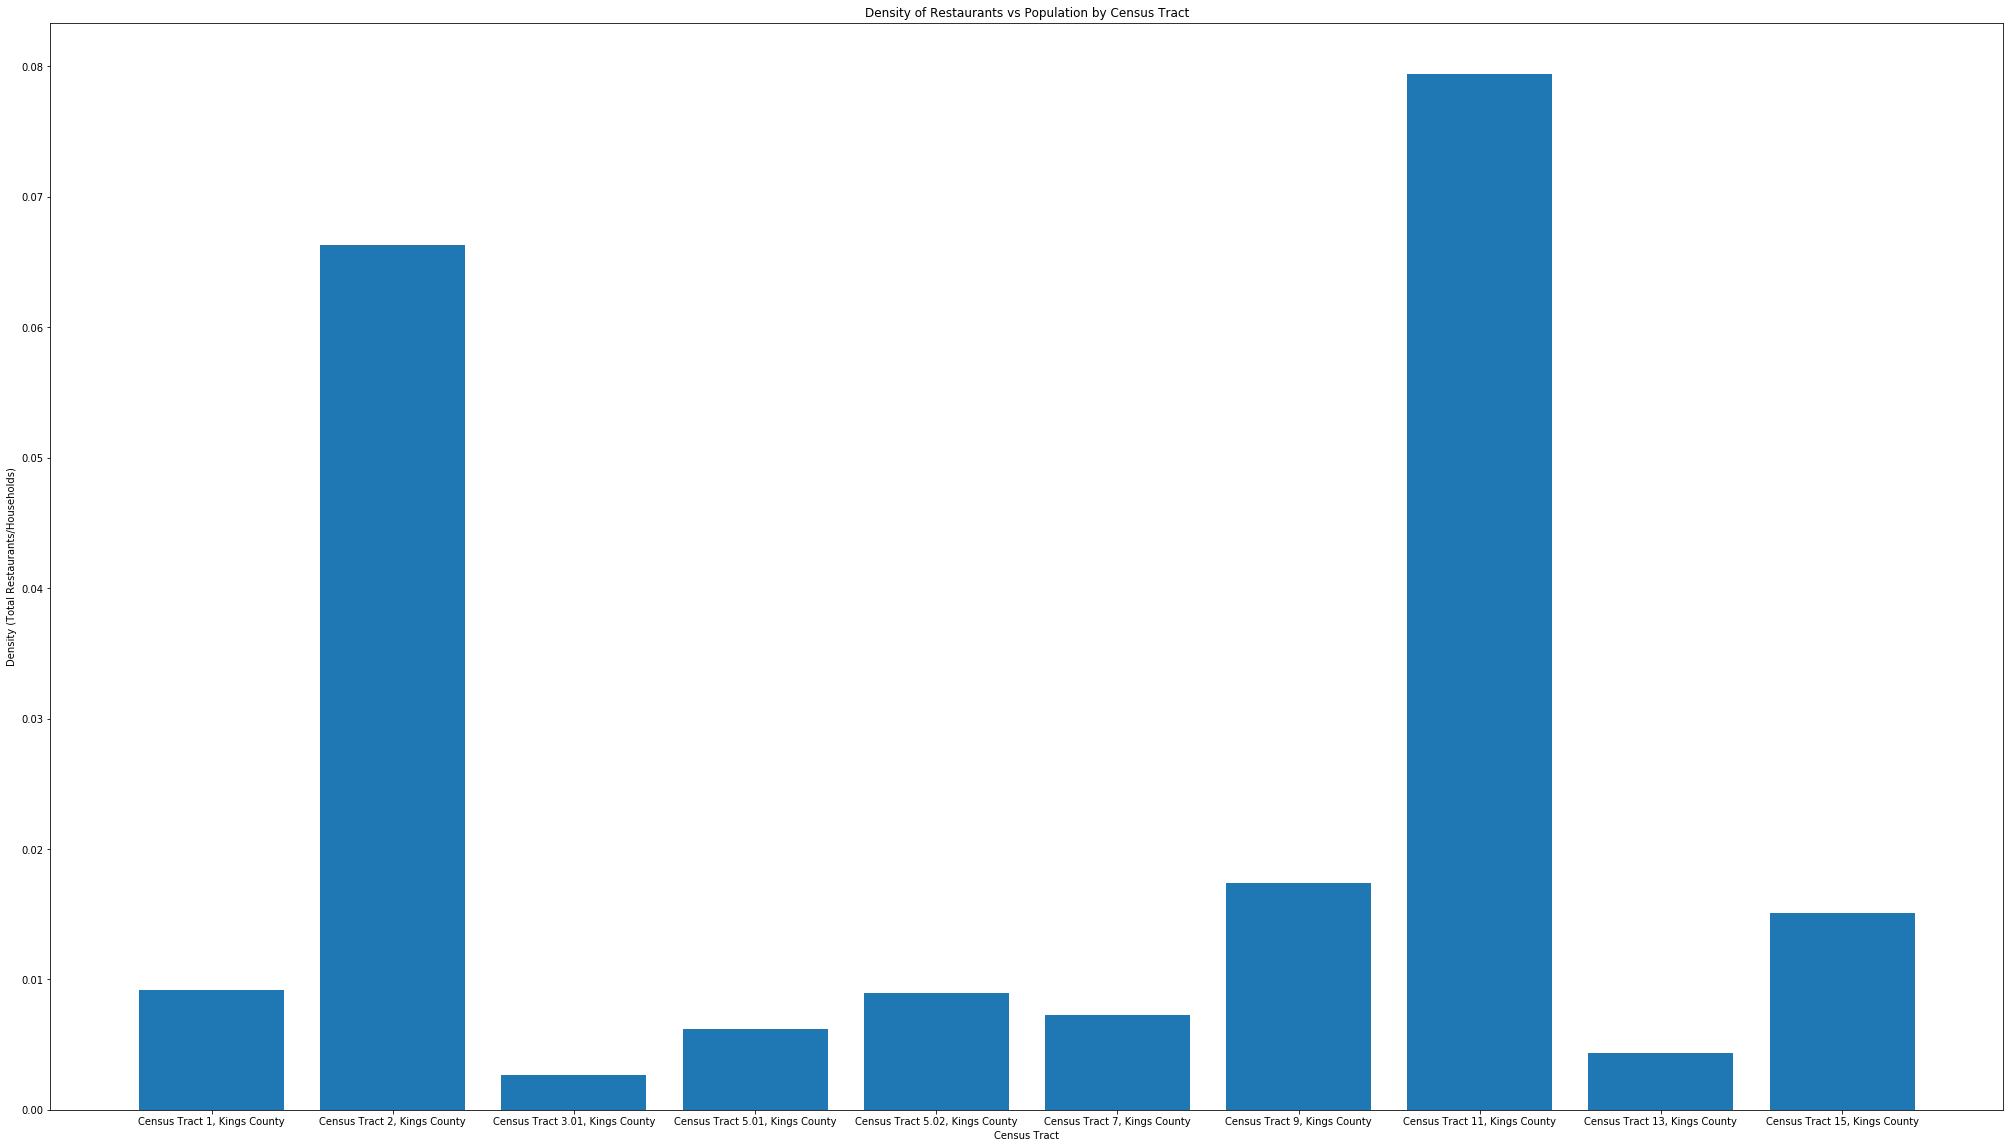

In [75]:
# PLOT RATIO OF TOTAL YELP REVIEWS VS TOTAL HOUSEHOLDS

xaxis = np.arange(1, len(bklyn10.Households)+1,1)
tick_label = (bklyn10.Geography.map(lambda x: str(x)[:-10])).tolist()

plt.figure(figsize=(35, 20))
plt.bar(xaxis, bklyn10.density, tick_label = tick_label)
plt.title('Density of Restaurants vs Population by Census Tract')
plt.xlabel('Census Tract')
plt.ylabel('Density (Total Restaurants/Households)')
plt.show()

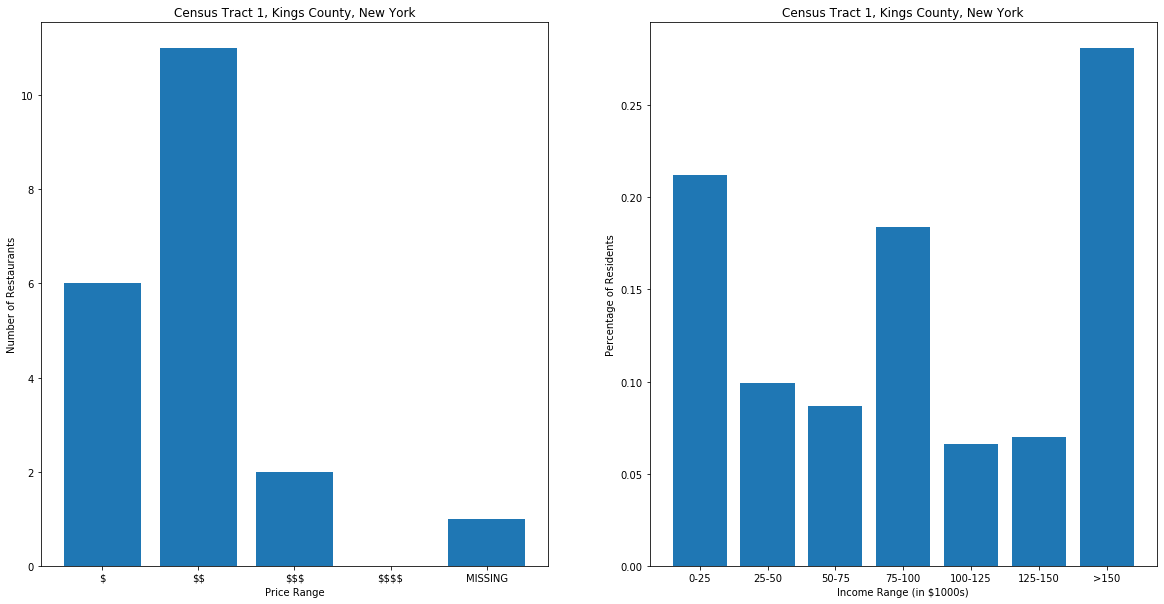

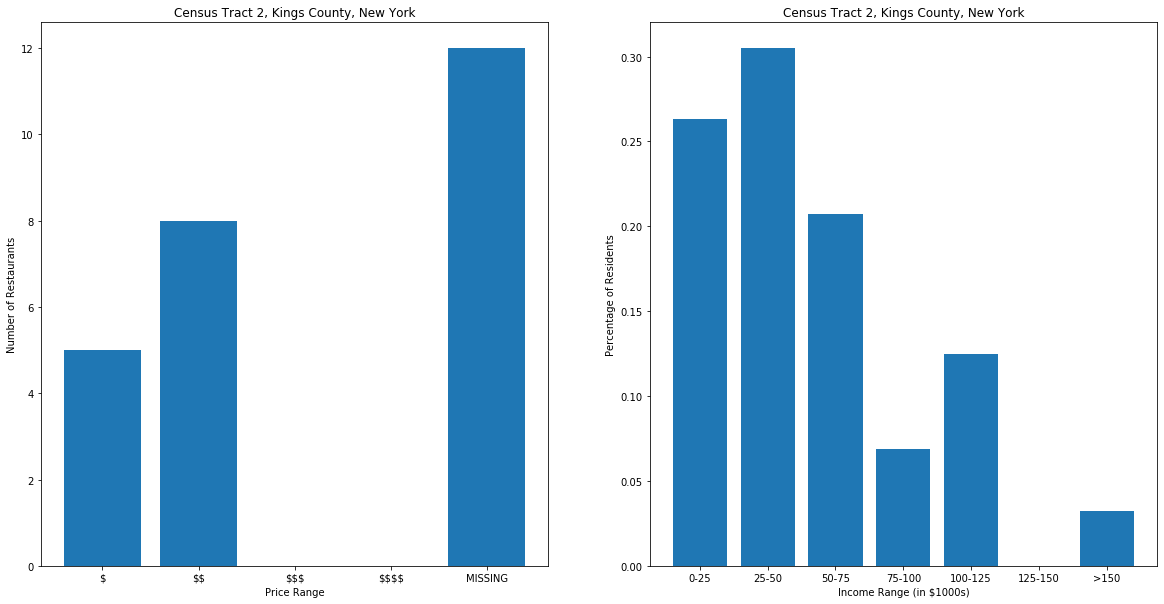

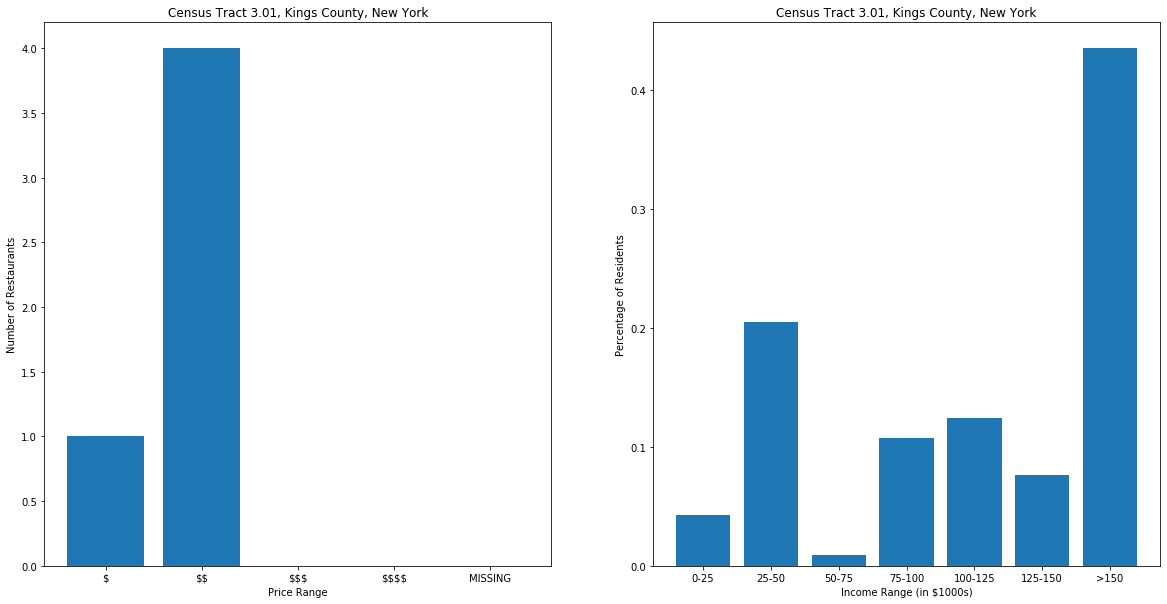

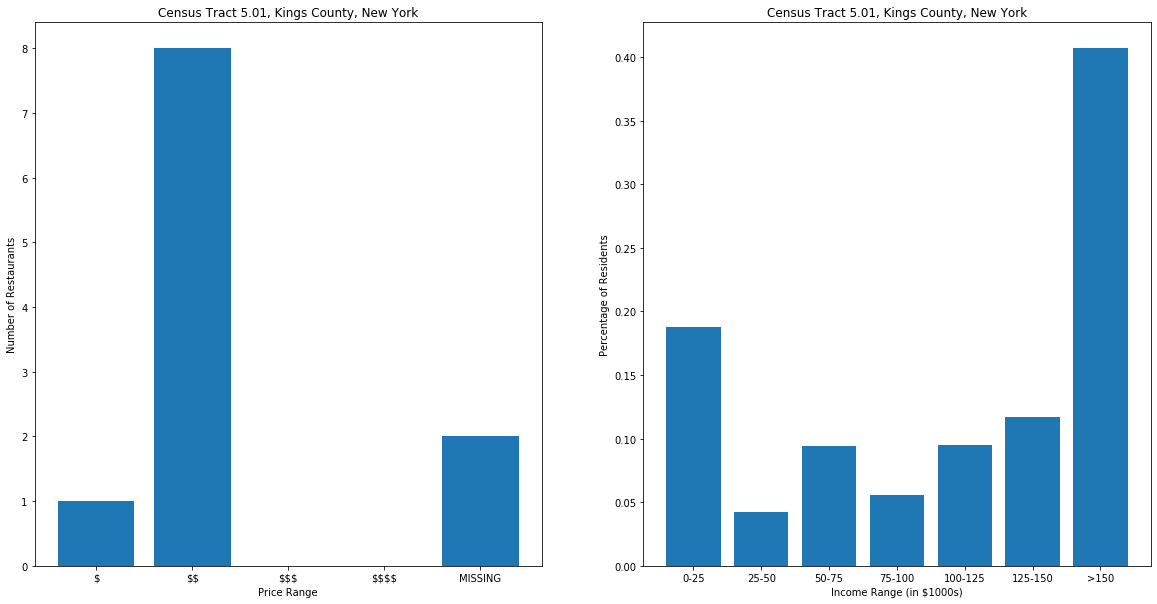

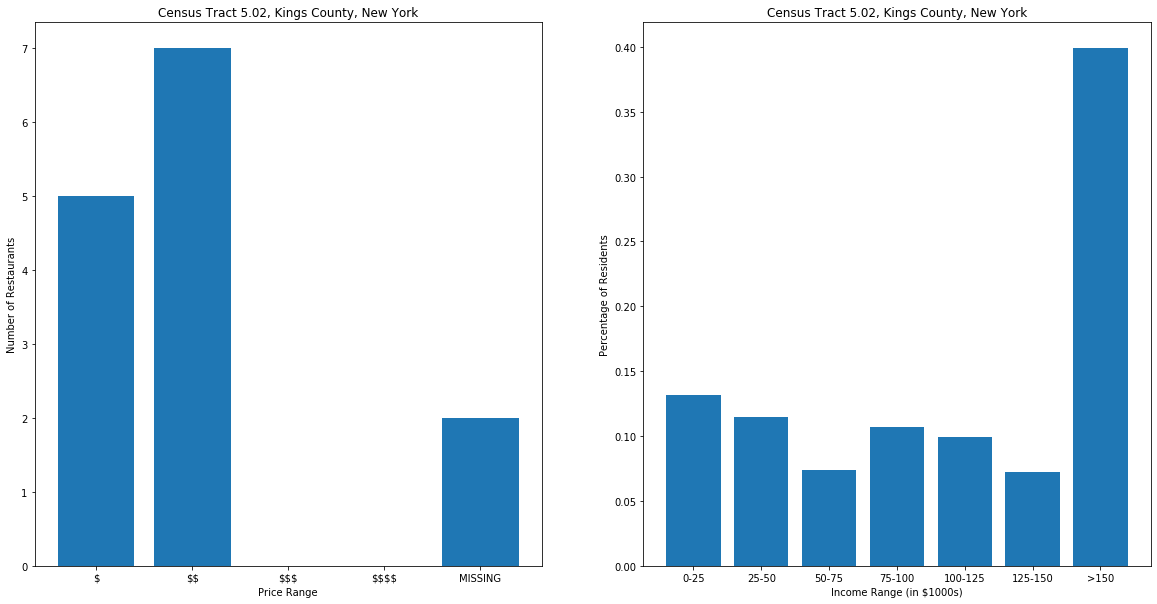

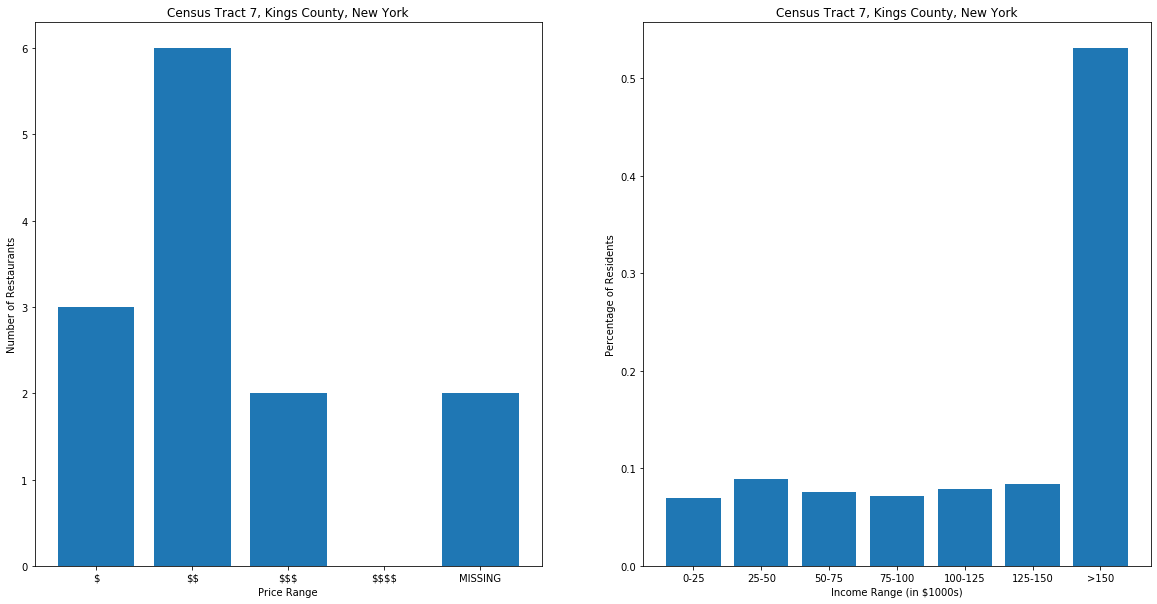

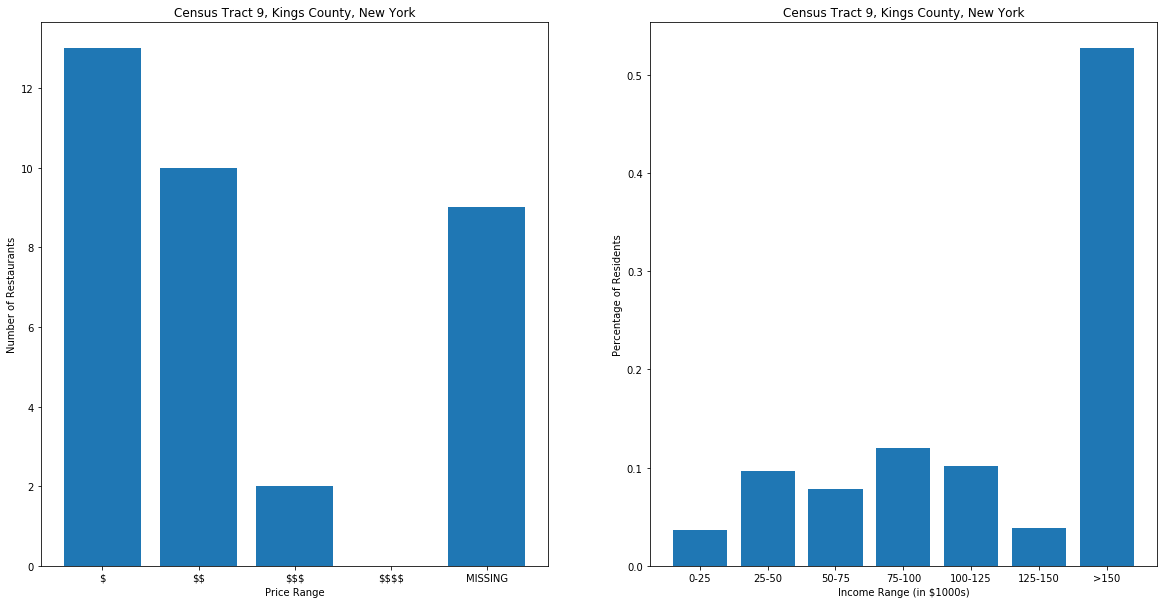

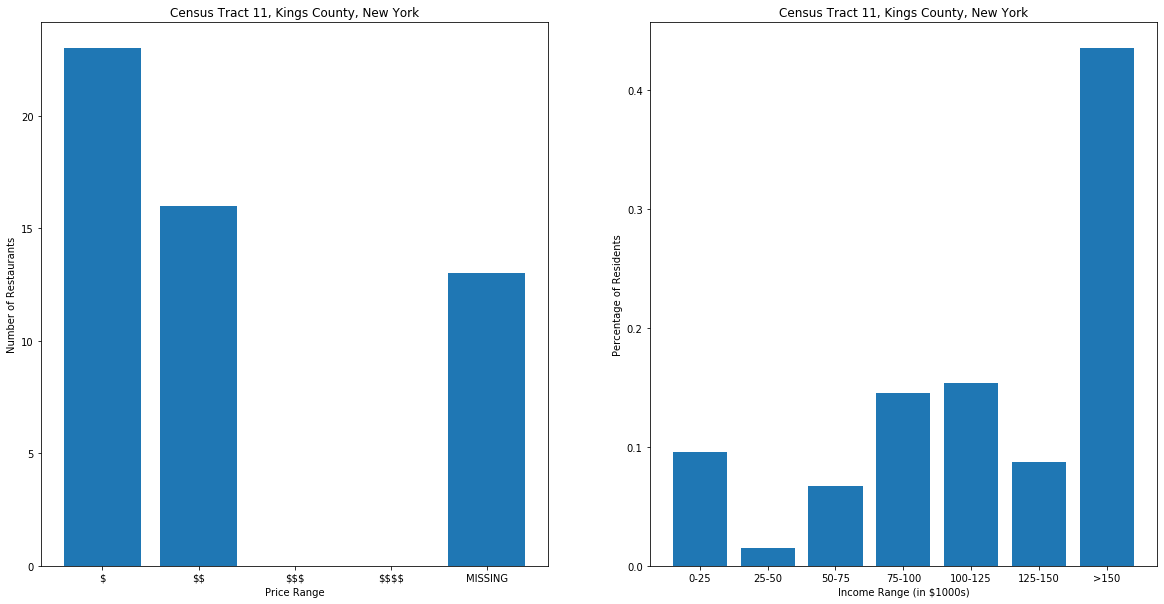

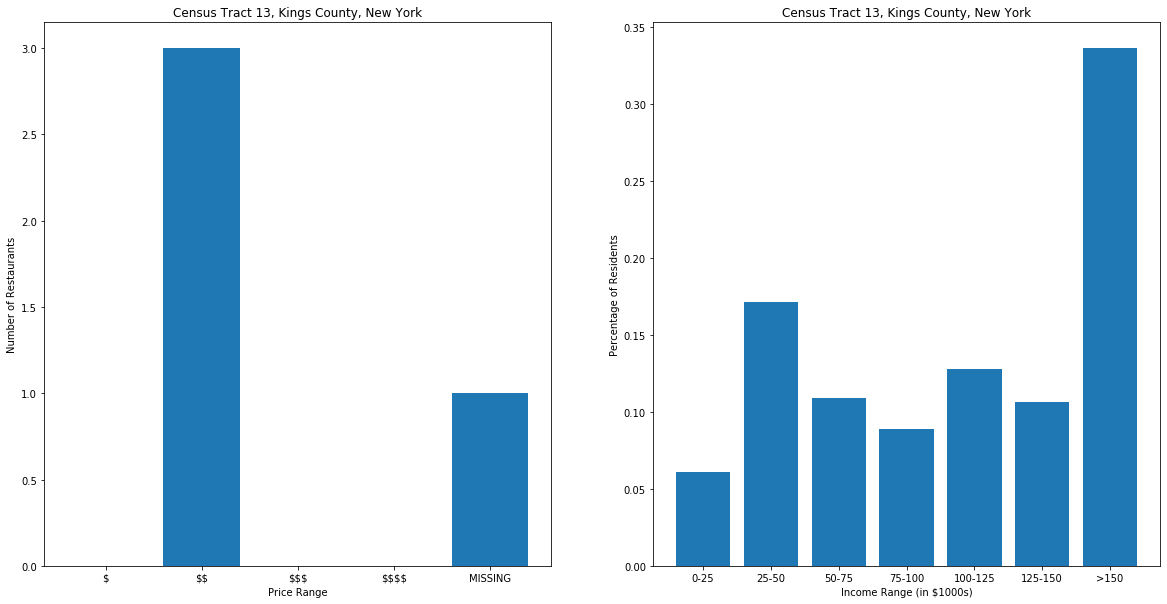

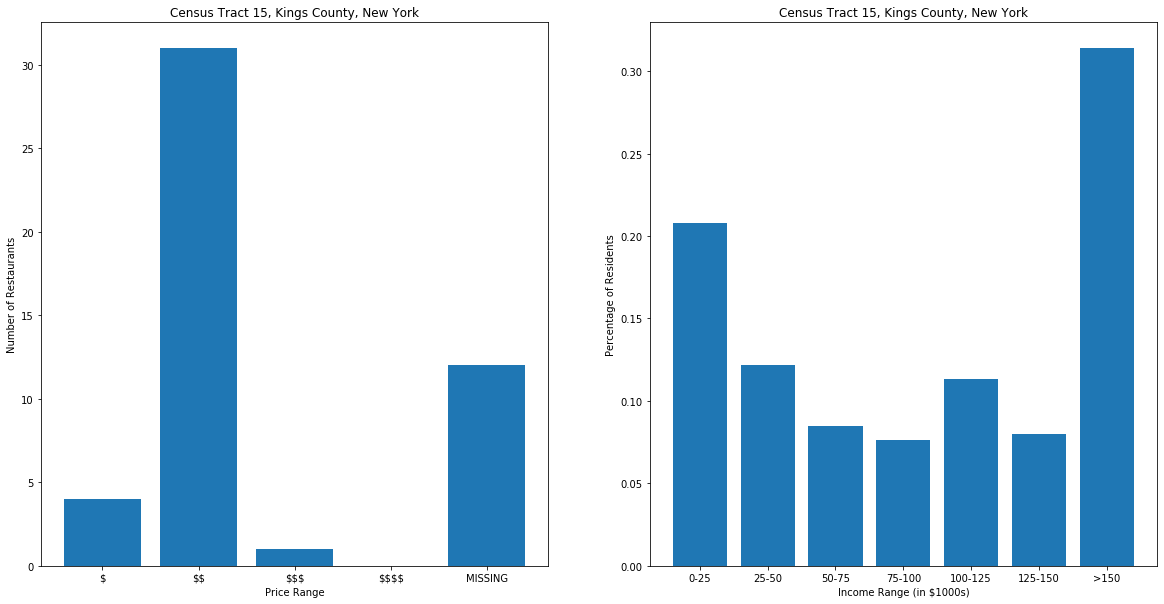

In [77]:
# FOR THE LOOP OF PLOTS

a = [1, 2, 3, 4, 5, 6, 7]
x = [1, 2, 3, 4, 5]
tick_label_1 = ["$", "\$\$", "\$\$\$", "\$\$\$\$", 'MISSING']
tick_label_2 = ['0-25','25-50','50-75','75-100','100-125','125-150','>150']


for i in range(len(bklyn10.index)):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    y = bklyn10.iloc[i]['price_$':'MISSING']
    plt.subplot(1,2,1)
    plt.bar(x,y, tick_label = tick_label_1)
    plt.title(bklyn10.iloc[i]['Geography'])
    plt.xlabel('Price Range')
    plt.ylabel('Number of Restaurants')


    b = bklyn10.iloc[i]['pct_0-25k':'pct_> 150k']
    plt.subplot(1,2,2)
    plt.bar(a,b, tick_label = tick_label_2)
    plt.title(bklyn10.iloc[i]['Geography'])
    plt.xlabel('Income Range (in $1000s)')
    plt.ylabel('Percentage of Residents')

    
#    z = bklyn10.iloc[i]['num_0-25k':'num_> 150k']
#    plt.subplot(1,3,3)
#    plt.bar(a,z, tick_label = tick_label_2)
#    plt.title(bklyn10.iloc[i]['Geography'])
#    plt.xlabel('Income Range (in $1000s)')
#    plt.ylabel('Number of Residents')
#    plt.show()